In [6]:
import keras
from keras import layers

In [2]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [4]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [7]:
(x_train, _), (x_test, _) = mnist.load_data()

In [8]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.2271 - val_loss: 0.1579
Epoch 2/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.1409 - val_loss: 0.1252
Epoch 3/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.1184 - val_loss: 0.1103
Epoch 4/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.1072 - val_loss: 0.1025
Epoch 5/5
60000/60000 [==============================] - 1s 25us/step - loss: 0.1009 - val_loss: 0.0974


In [10]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

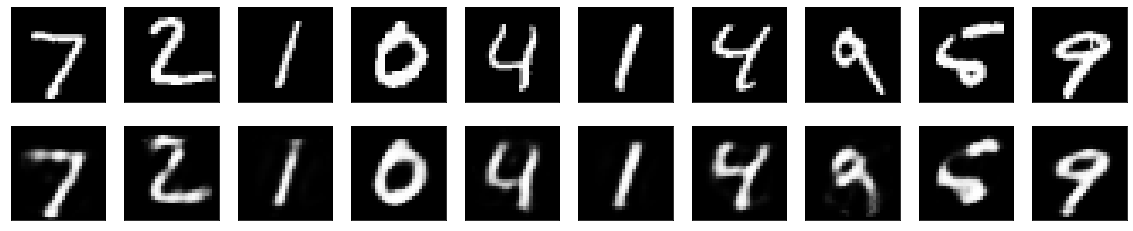

In [12]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [14]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.2478 - val_loss: 0.1694
Epoch 2/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.1521 - val_loss: 0.1372
Epoch 3/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1321 - val_loss: 0.1251
Epoch 4/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1229 - val_loss: 0.1190
Epoch 5/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.1174 - val_loss: 0.1136
Epoch 6/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.1124 - val_loss: 0.1088
Epoch 7/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.1087 - val_loss: 0.1059
Epoch 8/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.1060 - val_loss: 0.1037
Epoch 9/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.1038 - val_loss: 0.1